# Product Analysis

The dataset gives us electronics sales data at Amazon.

It contains user ratings for various electronics items sold, along with category of each item and time of sell.

The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('electronics.csv')

# list of first five rows
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [ ]:
# list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [ ]:
# shape
dataset.shape

(1292954, 10)

Check the columns and their corresponding data types, along with finding whether they contain null values or not.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB



We can see that the dataset contains 10 columns and 1292954 rows.    

The columns and data types are as follows:
1. Item ID - int64
2. User ID - int64
3. Rating - float64
4. Timestamp - object
5. Model Attribute - object
6. Category - object
7. Brand - object
8. Year - int64
9. User Attribute - object
10. Split - int64



In [ ]:
# Converting the column timestamp to datetime
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [ ]:
dataset['category'] = dataset['category'].astype(str)
dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)


In [ ]:
# Get the statistical summary of the dataset.

dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


the statistical summary of the dataset gives us the following information:

1. The mean rating is 4.
2. The minimum rating is 1.
3. The maximum rating is 5.
4. The standard deviation of the ratings is 1.4.
5. The 25th percentile of the ratings is 4.
6. The 50th percentile of the ratings is 5.
7. The 75th percentile of the ratings is 5.

In [ ]:
# Check the number of unique values or items in the dataset in every column
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              50
year               20
user_attr           2
split               3
dtype: int64

In [ ]:
type(dataset.rating)

pandas.core.series.Series

In [ ]:
# dataset.brand.dropna(inplace=True)
# dataset.brand.drop_duplicates(inplace=True)

In [ ]:
# Drop Nan values and dublicates in the dataset
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

In [ ]:
# check for duplicates
dataset.duplicated().sum()

0

In [ ]:
# check for missing values
dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

# Find answers within the dataset

Which ratings has most chosen?

<Axes: >

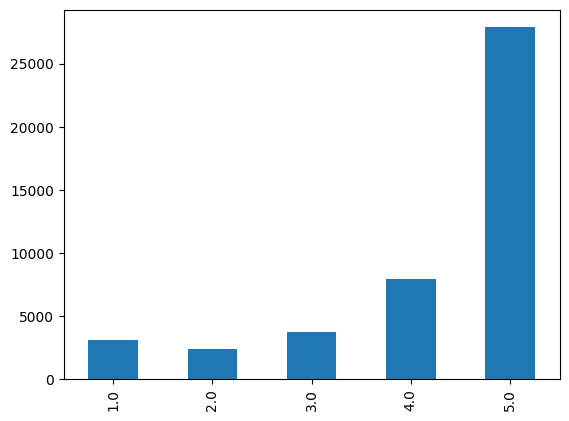

In [ ]:
dataset["rating"].value_counts().sort_index().plot(kind="bar")

What was the best year of sales?

<Axes: >

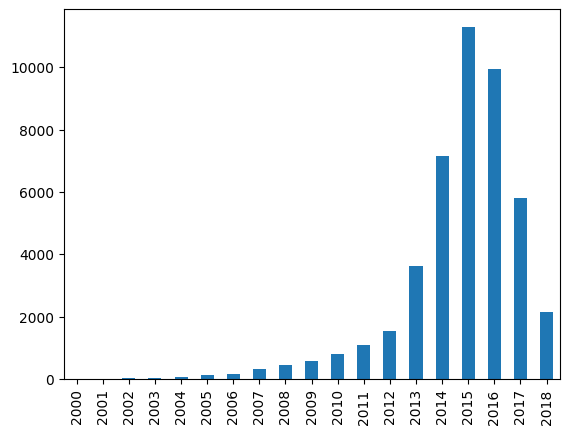

In [ ]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset["year"].value_counts().sort_index().plot(kind="bar")

We can see that the year 2015 had the best sales.

What brand sold the most in 2015?

<Axes: >

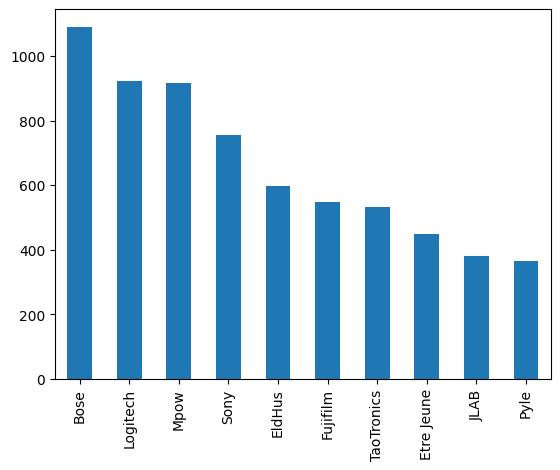

In [ ]:
dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015["brand"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

In [ ]:
# what was the best month of sales

<Axes: >

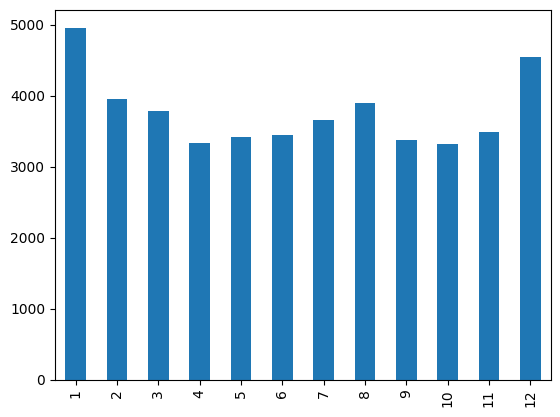

In [ ]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset["month"].value_counts().sort_index().plot(kind="bar")

The month of January had the best sales.


What product by brand name sold the most?

<Axes: >

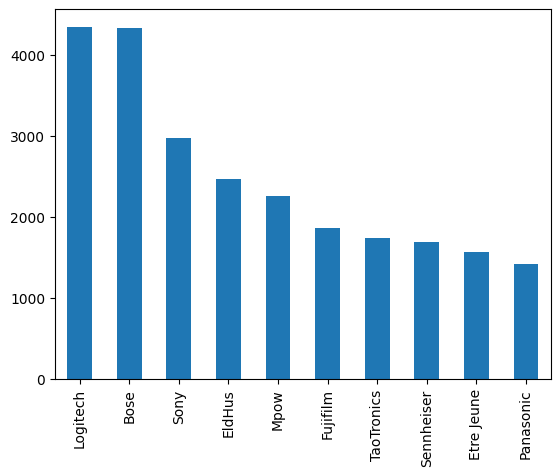

In [ ]:
dataset["brand"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

We can see that the brand name of Bose sold the most followed closely with Logitech.

What product by category sold the most?

<Axes: >

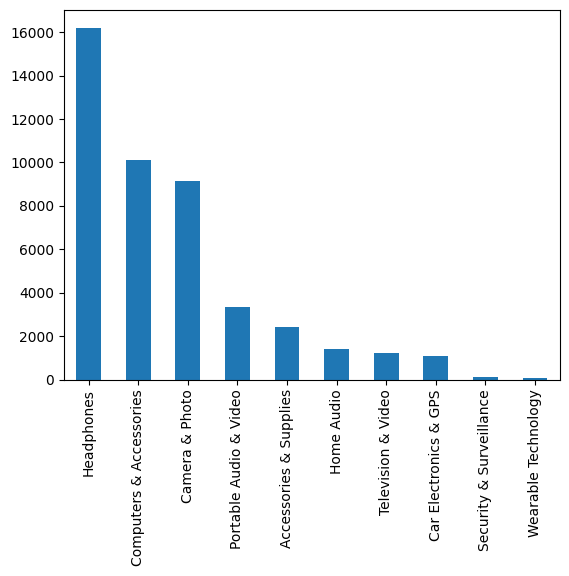

In [ ]:
dataset["category"].value_counts().sort_values(ascending=False).plot(kind="bar")

1. We can see that the category of Headphones sold the most.
2. Computers and accesories were sold the second most
3. Camera & photo sold the third most followed by Accesories and supplies.
4. The least sold category was Security and Surveillance.

Category percentage sales

<Axes: ylabel='category'>

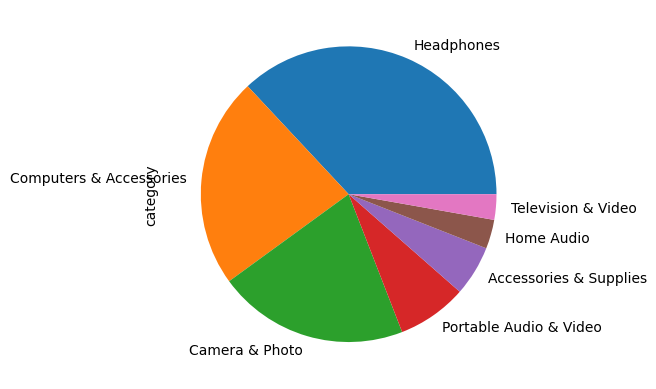

In [ ]:
dataset["category"].value_counts().head(7).plot(kind="pie")

Brand percentage sales

<Axes: ylabel='brand'>

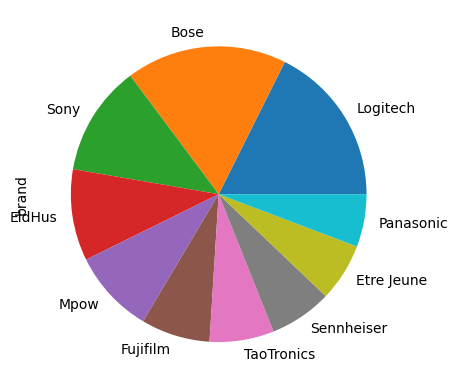

In [ ]:
dataset["brand"].value_counts().head(10).plot(kind="pie")

# conclusion of our analysis

1. We can see that the year 2015 had the best sales.
2. The month of January had the best sales.
3. We can see that the brands Bose and Logitech sold the most
4. We can see that the category of Headphones sold the most.
5. We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.
6. We can see that the category of Security and Surveillance sold the least.